<img src="Lapage.png" alt="Lapage" width=250 height=250>

<h1 style="color:Black;font-size:300%;text-align:center;">Projet 6</h1>
<p  style="color:Black;font-size:300%;text-align:center;">Analysez les ventes d'une librairie (suite)</p>
<p  style="color:Black;font-size:200%;text-align:start;">Sommaire</p>

<p style="color:Black;font-size:150%;text-align:start;"><a href="#introduction"> Introduction</a></p>

<p style="color:Black;font-size:150%;text-align:start;"><a href="#Analyse">I. Analyse univariée</a></p>
<ol>
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#alpha">Répartition du CA par catégories de produit</a></li>   
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#beta">Répartition du CA par tranche d'age</a></li>  
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#meta">Répartition du CA par catégorie et par tranche d'age</a></li>    
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#teta">Evolution du CA dans le temps</a></li>  
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#gamma">Décomposition par la moyenne mobile</a></li>   
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#tomme">Determiner les ventes par produit, les tops des ventes et les flots des ventes</a></li>     
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#homme">Nombres de ventes par catégorie</a></li>   
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#sigma">Le profil des clients et la répatition du CA entre eux</a></li>   
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#omega">Répartition du CA par age et par sexe</a></li>
</ol> 
<p style="color:Black;font-size:150%;text-align:start;"><a href="#somme">II. Analyse bivariée</a></p>
    
<ol>
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#mean">Relation entre genre d'un client et catégorie de livre </a></li>    
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#loc">Relation entre age d'un client et le montant total des achats</a></li>
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#Moc">Relation entre age d'un client et la fréquence</a></li>  
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#Noc">Relation entre age d'un client et le panier moyen</a></li>  
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#pin">Relation entre age d'un client et le catégorie de livre</a></li>   
</ol> 
    
<p style="color:Black;font-size:150%;text-align:start;"><a href="#Conclusion"> Conclusion</a></p>   

<h2 ><a id="introduction">Introduction</a></h2>

Dans la seconde partie de notre analyse, nous allons répondre aux différentes questions d'Antoine et de Julie.

Travaille à Faire:
- Analyser les différents  indicateurs des ventes (CA)
- Analyser le comportement des clients.

<h2 ><a id="Analyse">I. Analyse univariée</a></h2>

L'analyse univariée consiste à faire une analyse sur une variable.  
Nous allons analyser la variable chiffre d'affaires et les différents indicateurs autour de celui-ci.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import datetime as dt
import warnings
warnings.simplefilter("ignore")

### Importation du fichier df_final

In [2]:
df_final = pd.read_csv("df_final.csv")
# convertir au format datetimes la colonne date.
df_final["date"] = pd.to_datetime(df_final["date"], format = "%Y-%m-%d")
df_final.head()

,id_prod,date,session_id,client_id,heure,sex,birth,age_client,tranche_d'age,price,categ
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,f,1986,36,36 - 45ans,4.18,0
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409,m,1988,34,26 - 35ans,15.99,1
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329,f,1968,54,46 - 55ans,7.99,0
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891,m,2000,22,15 - 25ans,69.99,2
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479,m,1980,42,36 - 45ans,4.99,0


<h3 ><a id="alpha">1. Répartition du CA par catégorie</a></h3>

In [3]:
ca_par_categ= df_final.pivot_table(values = ["price"] , index = ["categ"], aggfunc= np.sum)
ca_par_categ["propotion du CA par categorie en %"] = round(((ca_par_categ["price"])/(ca_par_categ["price"].sum())*100),2)
ca_par_categ

,price,propotion du CA par categorie en %
categ,,
0,4422082.41,37.30
1,4653722.69,39.25
2,2780275.02,23.45


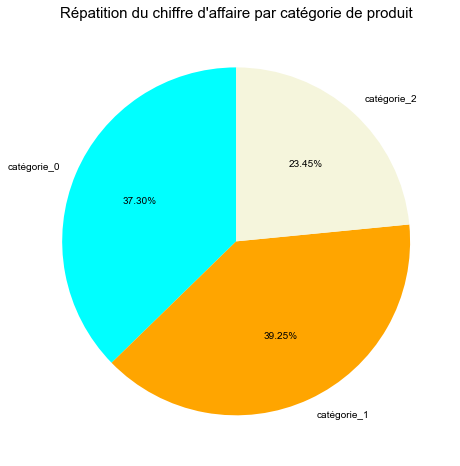

In [4]:
fig = plt.figure(figsize = (10,8))
labels= ["catégorie_0", "catégorie_1", "catégorie_2"]
colors = ["cyan", "orange", "beige"]
plt.pie(ca_par_categ["price"], labels = labels, colors = colors, autopct = "%1.2f%%", startangle=90)
plt.title("Répatition du chiffre d'affaire par catégorie de produit",fontsize=15)
sns.set_style("white")
plt.show()

**Les produits de categories_1 sont les plus vendus sur le site (39,25%).**

In [5]:
ca_par_tranche_age = df_final.pivot_table(values = ["price"] ,index = ["tranche_d'age"], aggfunc= np.sum)
ca_par_tranche_age["propotion du CA par tranche_d'age en %"] = round(((ca_par_tranche_age["price"])/(ca_par_tranche_age["price"].sum())*100),2)
ca_par_tranche_age

,price,propotion du CA par tranche_d'age en %
tranche_d'age,,
15 - 25ans,2190905.80,18.55
26 - 35ans,2370752.48,20.08
36 - 45ans,3114034.57,26.37
46 - 55ans,2161898.47,18.31
56 - 65ans,1056079.29,8.94
66 - 75ans,666548.02,5.64
76 - plus,248785.22,2.11


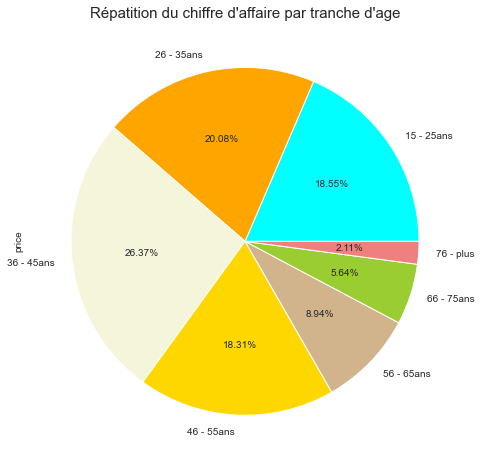

In [6]:
fig = plt.figure(figsize = (10,8))
plt.title("Répatition du chiffre d'affaire par tranche d'age",fontsize=15)
colors = ["cyan", "orange", "beige","gold","tan","yellowgreen","lightcoral"]
ca_par_tranche_age["price"].plot(kind = "pie", colors = colors, autopct = "%1.2f%%")
sns.set_style("white")
plt.show()

- **Les clients agés entre 36 et 45 ans participent à hauteur de 26.36% du CA.**
- **Les clients qui achétent le plus de livre sont agés entre 36 et 45 ans.**

<h3 ><a id="meta">3. Répartition du CA par catégorie et par tranche d'age</a></h3>

----------------------------------------------------------------------------------------------------
catégorie 0
                    price  propotion du CA par tranche_d'age en %
tranche_d'age                                                    
15 - 25ans      115654.13                                    2.62
26 - 35ans      843870.90                                   19.14
36 - 45ans     1912268.25                                   43.38
46 - 55ans      993955.63                                   22.55
56 - 65ans      292017.48                                    6.62
66 - 75ans      183139.08                                    4.15
76 - plus        67750.84                                    1.54


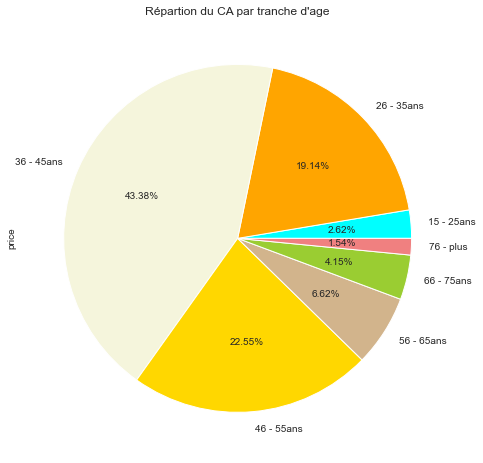

----------------------------------------------------------------------------------------------------
catégorie 1
                    price  propotion du CA par tranche_d'age en %
tranche_d'age                                                    
15 - 25ans      405076.71                                    8.76
26 - 35ans      663754.82                                   14.36
36 - 45ans     1128111.61                                   24.41
46 - 55ans     1083230.35                                   23.44
56 - 65ans      715619.95                                   15.48
66 - 75ans      456406.09                                    9.87
76 - plus       169708.30                                    3.67


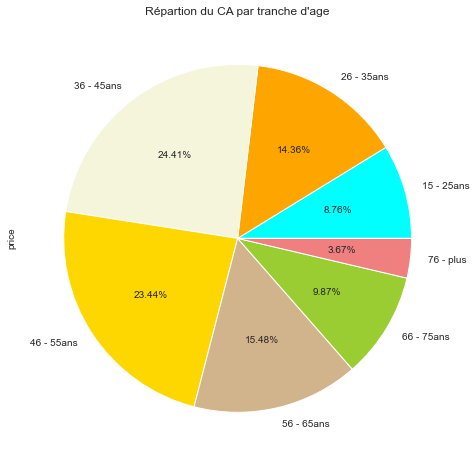

----------------------------------------------------------------------------------------------------
catégorie 2
                    price  propotion du CA par tranche_d'age en %
tranche_d'age                                                    
15 - 25ans     1670174.96                                   60.11
26 - 35ans      863126.76                                   31.07
36 - 45ans       73654.71                                    2.65
46 - 55ans       84712.49                                    3.05
56 - 65ans       48441.86                                    1.74
66 - 75ans       27002.85                                    0.97
76 - plus        11326.08                                    0.41


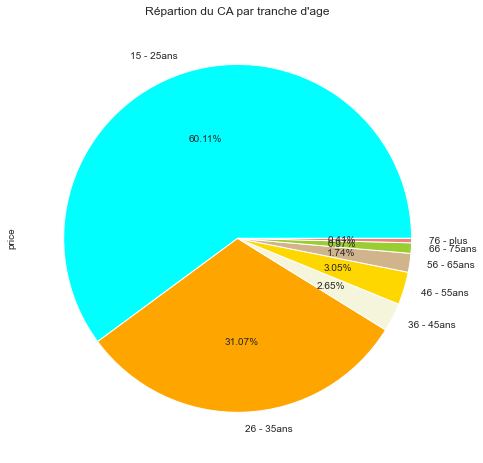

In [7]:
for i in df_final["categ"].unique():
    subset = df_final[df_final.categ == i]
    
    ca_par_categ_et_tranche_age = subset.pivot_table(values = ["price"] , index = ["tranche_d'age"], aggfunc= np.sum)
    ca_par_categ_et_tranche_age["propotion du CA par tranche_d'age en %"] = round(((ca_par_categ_et_tranche_age["price"])/
                                                                                   (ca_par_categ_et_tranche_age["price"].sum())*100),2)
    
    print("-"*100)
    print("catégorie" , i)
    print(ca_par_categ_et_tranche_age)
    colors = ["cyan", "orange", "beige","gold","tan","yellowgreen","lightcoral"]
    ca_par_categ_et_tranche_age["price"].plot(kind = "pie",figsize = (10,8), colors = colors, autopct = "%1.2f%%",
                                              title= "Répartion du CA par tranche d'age")
    plt.show()

<h3 ><a id="teta">4. Evolution du chiffre d'affaire dans temps</a></h3>

In [56]:
#Inserer une colonne période dans le dataFrame
df_final["periode"] = df_final["date"].dt.to_period("m")
#df_final["periode"].periodindex.to_timestamp()
df_final.dtypes

id_prod                  object
date             datetime64[ns]
session_id               object
client_id                object
heure                    object
sex                      object
birth                     int64
age_client                int64
tranche_d'age            object
price                   float64
categ                     int64
periode               period[M]
type_client              object
dtype: object

In [9]:
#Faire un TCD avec la methode pd.pivot_table
ca= df_final.pivot_table(values = ["price","id_prod"] , index = ["periode","date"], aggfunc= {"price":"sum","id_prod":"count"}).reset_index()
ca.rename(columns = {"id_prod":"nb_vente"}, inplace = True)
ca.head()

,periode,date,nb_vente,price
0,2021-03,2021-03-01,963,16575.86
1,2021-03,2021-03-02,940,15497.09
2,2021-03,2021-03-03,911,15198.69
3,2021-03,2021-03-04,903,15196.07
4,2021-03,2021-03-05,943,17471.37


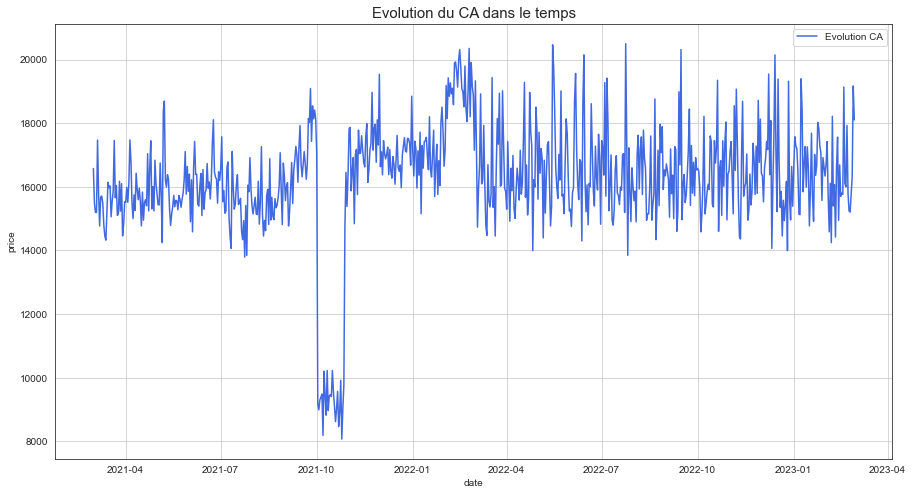

In [10]:
plt.figure(figsize = (15,8))
#sns.lineplot(x = "date", y = "price", data = ca)
sns.lineplot(x = "date", y = "price", data = ca,label = "Evolution CA", color= "Royalblue")
plt.title("Evolution du CA dans le temps",fontsize=15)
plt.grid(True)

**On constate un baisse de l'évolution de chiffre d'affaire au mois d'octobre 2021. Nous allons analyser cette baisse.**

**Evolution du chiffre d'affaire du mois d'octobre 2021 en fonction des catégories de produit**

In [11]:
ca_oct = df_final.pivot_table(values = ["price","id_prod",], index = ["periode","date","categ"], aggfunc= {"price":"sum","id_prod":"count"}).reset_index()
ca_oct.rename(columns = {"id_prod":"nb_vente"}, inplace=True)
ca_oct_categ = ca_oct.loc[ca_oct["periode"] =="2021-10"]
ca_oct_categ.head()

,periode,date,categ,nb_vente,price
642,2021-10,2021-10-01,0,663,6950.50
643,2021-10,2021-10-01,1,344,7003.79
644,2021-10,2021-10-01,2,38,3104.05
645,2021-10,2021-10-02,0,661,7141.01
646,2021-10,2021-10-02,2,28,2041.12


----------------------------------------------------------------------------------------------------
catégorie 0


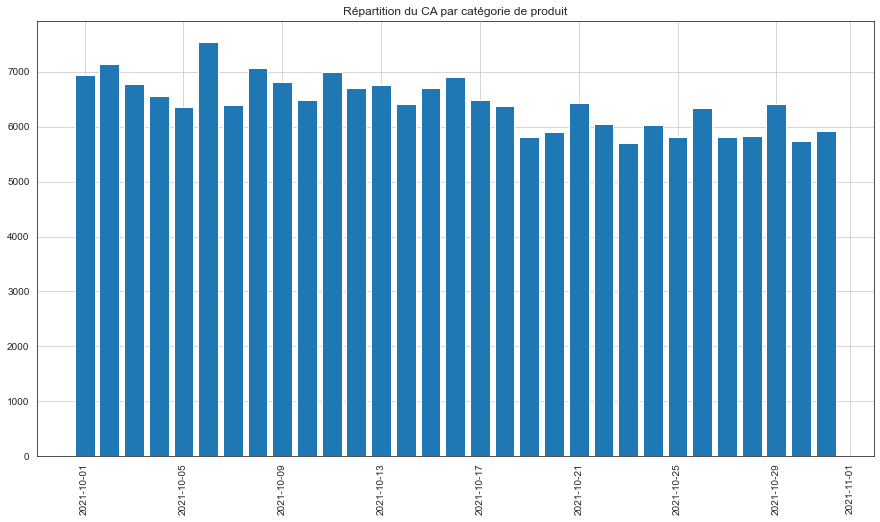

----------------------------------------------------------------------------------------------------
catégorie 1


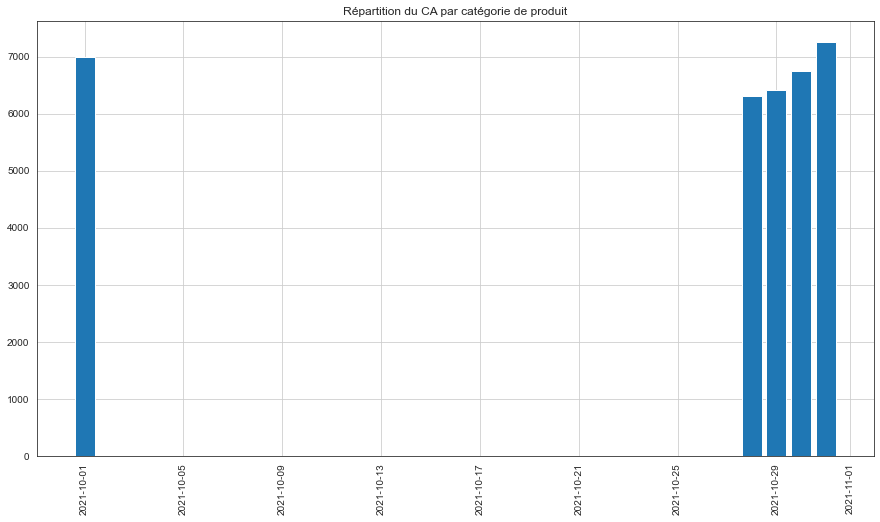

----------------------------------------------------------------------------------------------------
catégorie 2


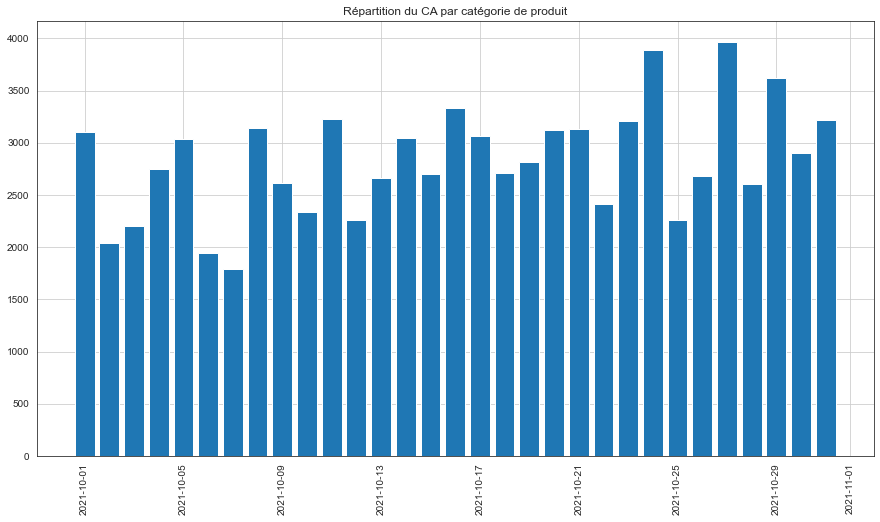

In [63]:
for i in ca_oct_categ["categ"].unique():
    subset = ca_oct_categ[ca_oct_categ.categ == i]
    print("-"*100)
    print("catégorie" , i)
    plt.figure(figsize = (15,8))
    plt.title("Répartition du CA par catégorie de produit")
    plt.bar(subset[subset["periode"] == "2021-10"]["date"], subset[subset["periode"] == "2021-10"]["price"])
    plt.xticks(rotation = "vertical")
    plt.grid(True)
    plt.show()

**On constate que du 02/10/2021 au 27/10/2021 aucun produit de categorie 1 n'a été vendu.**  
**C'est ce qui explique la baisse du CA au mois d'onctoble 2021.**

<h3 ><a id="gamma">5. Decomposition par la moyenne mobile (MM)</a></h3>

In [13]:
decomposition= ca.copy()
decomposition["moyenne_mobile"]=decomposition.price.rolling(30).mean()
decomposition["mm_hebdomadaire"]=decomposition.price.rolling(7).mean()
decomposition.head()

,periode,date,nb_vente,price,moyenne_mobile,mm_hebdomadaire
0,2021-03,2021-03-01,963,16575.86,NaN,NaN
1,2021-03,2021-03-02,940,15497.09,NaN,NaN
2,2021-03,2021-03-03,911,15198.69,NaN,NaN
3,2021-03,2021-03-04,903,15196.07,NaN,NaN
4,2021-03,2021-03-05,943,17471.37,NaN,NaN


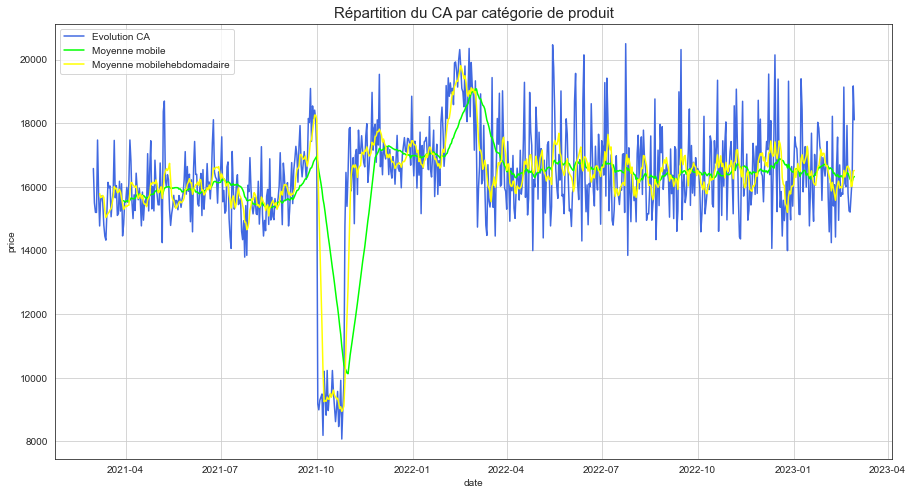

In [14]:
plt.figure(figsize = (15,8))
sns.lineplot(x = "date", y = "price", data = decomposition, label = "Evolution CA", color= "Royalblue")
sns.lineplot(x = "date", y = "moyenne_mobile", data = decomposition, label = "Moyenne mobile",  color = "lime" )
sns.lineplot(x = "date", y = "mm_hebdomadaire", data = decomposition, label = "Moyenne mobilehebdomadaire", color="yellow" )
plt.title("Répartition du CA par catégorie de produit",fontsize=15)
plt.legend()
plt.grid(True)

**La courbe de la moyenne mobile fait apparaitre plusieurs saisonnalités dans la vente des produits. On a des saisons de forte activité,  de faible d'activité.**       
- **Entre 08-2021 et 09-2021 on constate une baisse des ventes.**  
- **Entre 02-2022 et 04-2022 on constate une augmentation des ventes.**

<h3 ><a id="tomme">6. Déterminer les ventes par produit, les tops des ventes et les flots des ventes</a></h3>

<h4 >a) Déterminer les ventes par produit</h4>

In [15]:
ca_prod = df_final.copy()
ca_prod = ca_prod.assign(nb_ventes=1)
ca_prod = ca_prod.groupby(["id_prod","price","categ"]).agg({"nb_ventes":"sum"}).reset_index() 
ca_prod["ca"]=ca_prod["price"]*ca_prod["nb_ventes"]
ca_prod["proportion des ventes en %"]= round((ca_prod["nb_ventes"]/ca_prod["nb_ventes"].sum())*100,2)
ca_prod["proportion du ca en %"]= round((ca_prod["ca"]/ca_prod["ca"].sum())*100,2)
ca_prod.head()

,id_prod,price,categ,nb_ventes,ca,proportion des ventes en %,proportion du ca en %
0,0_0,3.75,0,1242,4657.50,0.18,0.04
1,0_1,10.99,0,487,5352.13,0.07,0.05
2,0_10,17.95,0,22,394.90,0.00,0.00
3,0_100,20.60,0,3,61.80,0.00,0.00
4,0_1000,6.84,0,432,2954.88,0.06,0.02


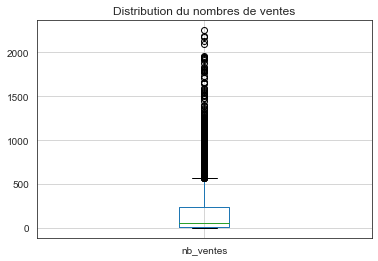

In [16]:
ca_prod.boxplot(column = ["nb_ventes"])
plt.title("Distribution du nombres de ventes")
plt.show()

**On constate des outliers au niveau de la variable nombres de ventes des produits.  
Certains produits ont été vendus en quantité importantes.**

<h4 >b) Les tops 10 des ventes</h4>

In [17]:
top_vente = ca_prod.sort_values("nb_ventes",ascending = False).head(10)
top_vente[["id_prod","nb_ventes","proportion des ventes en %"]].head(10)

,id_prod,nb_ventes,proportion des ventes en %
2592,1_369,2252,0.33
2645,1_417,2189,0.32
2642,1_414,2180,0.32
2734,1_498,2128,0.31
2654,1_425,2096,0.31
2630,1_403,1960,0.29
2640,1_412,1951,0.29
2641,1_413,1945,0.29
2633,1_406,1939,0.29
2634,1_407,1935,0.28


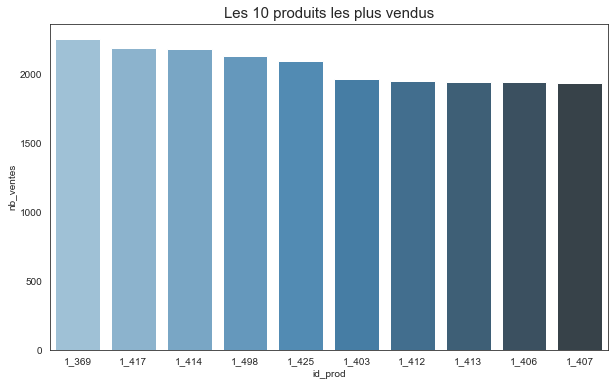

In [18]:
plt.figure(figsize = (10,6))
sns.barplot(x="id_prod", y="nb_ventes", data=top_vente,  palette="Blues_d")
plt.title("Les 10 produits les plus vendus",fontsize=15)
plt.show()

**Les 10 meilleurs ventes sont de produits decatégories 1.**

<h4 >c) les flots des ventes</h4>

In [19]:
flop_vente = ca_prod.sort_values("nb_ventes",ascending = True).head(10)
flop_vente[["id_prod","nb_ventes","proportion des ventes en %"]].head(10)

,id_prod,nb_ventes,proportion des ventes en %
1793,0_549,1,0.0
1327,0_2201,1,0.0
3176,2_23,1,0.0
313,0_1284,1,0.0
752,0_1683,1,0.0
2109,0_833,1,0.0
3264,2_98,1,0.0
698,0_1633,1,0.0
665,0_1601,1,0.0
3248,2_81,1,0.0


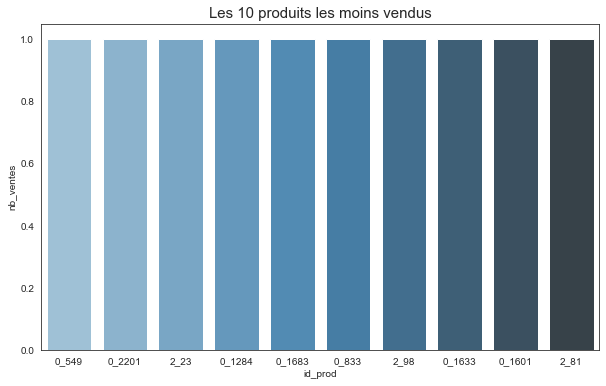

In [20]:
plt.figure(figsize = (10,6))
sns.barplot(x="id_prod", y="nb_ventes", data=flop_vente,  palette="Blues_d")
plt.title("Les 10 produits les moins vendus",fontsize=15)
plt.show()

<h3 <a id="homme">6. Nombre de vente par catégories</a></h3>

In [21]:
#top_categ = ca_prod["categ"].value_counts(normalize = True).sort_values()
#top_categ
nb_categ = df_final.copy()
nb_categ = nb_categ.pivot_table(values = ["id_prod"], index = ["categ"], aggfunc= {"id_prod":"count"}).reset_index()
nb_categ["proportion des ventes en %"]= round((nb_categ["id_prod"]/nb_categ["id_prod"].sum())*100,2)
nb_categ

,categ,id_prod,proportion des ventes en %
0,0,415680,61.19
1,1,227169,33.44
2,2,36483,5.37


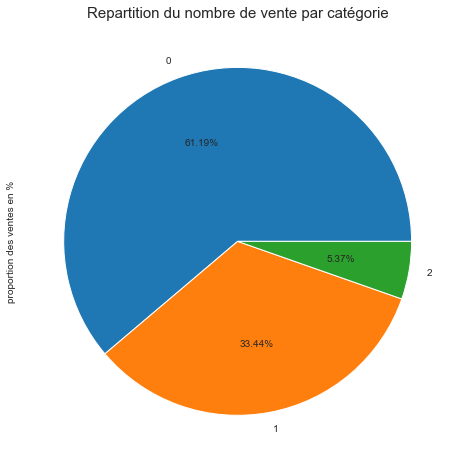

In [22]:
plt.figure(figsize = (15,8))
plt.title("Repartition du nombre de vente par catégorie",fontsize=15)
nb_categ["proportion des ventes en %"].plot(kind="pie" ,autopct = "%1.2f%%")
sns.set_style("white")
plt.show()

- **Les produits de catégorie 0 sont vendus en quantité importantes.** 

<h3 ><a id="sigma">7. Le profil des clients et la répartition du chiffre d'affaire entre eux</a></h3>

#### Le profil des clients

In [23]:
df_final["type_client"] = "particulier"
# 
client_trie_decroissant = df_final.groupby("client_id").size().sort_values(ascending=False).index
professionnels = client_trie_decroissant[:4]
professionnels
df_final['type_client'][df_final['client_id'].isin(professionnels) ] = "professionnel"

In [24]:
df=df_final.pivot_table(values = ["price"] , index = ["type_client"],aggfunc= {"price":"sum"}).reset_index()
df

,type_client,price
0,particulier,10974953.82
1,professionnel,881126.30


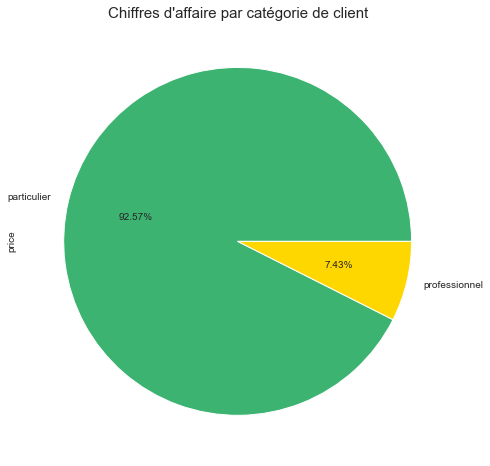

In [25]:
plt.figure(figsize = (15,8))
label = ["particulier","professionnel"]
color= ["mediumseagreen","gold"]
sns.set_style("white")
df["price"].plot(kind = "pie",  autopct= "%1.2f%%",labels =label , colors =color)
plt.title("Chiffres d'affaire par catégorie de client",fontsize=15)
plt.show()

**Lapage réalise 7,43% de son CA sur les clients 4 clients professionnels.**

In [26]:
client_pro=df_final.loc[df_final["type_client"]=="professionnel"]
df=client_pro.pivot_table(values = ["price"] , index = ["client_id","sex"],aggfunc= {"price":"sum"}).reset_index()
df

,client_id,sex,price
0,c_1609,m,324033.35
1,c_3454,m,113669.85
2,c_4958,m,289760.34
3,c_6714,f,153662.76


**Les clients professionnels sont identifiés par c_1609, c_3454, c_4958 et c_6714 et sont constitués de 3 males et 1 female.**

### courbe de Lorenz
La courbe de Lorenz est une représentation graphique permettant de visualiser la distribution d'une variable ici prix.

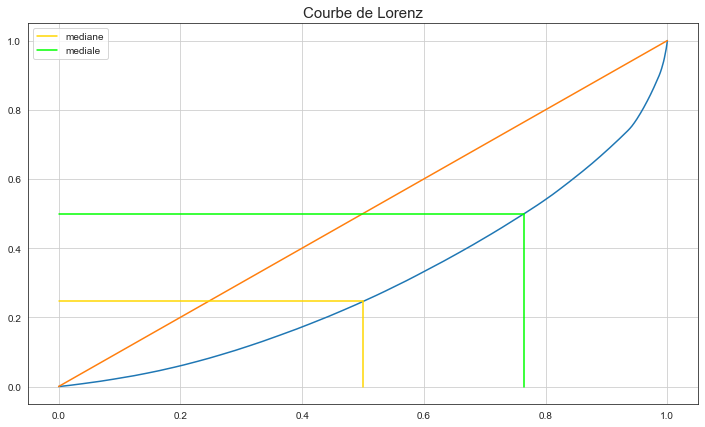

In [27]:
client_particuliers = df_final.loc[df_final["type_client"]=="particulier"]
y= client_particuliers["price"].values
n=len(y)
# axe Y : Cumsum, de 0 à 1
lorenz = np.cumsum(np.sort(y))/y.sum()
lorenz = np.append([0],lorenz) # La courbe de lorenz commence par 0
#plt.axes().axis()
# X axe: Linspace, from 0 to 1
xaxis = np.linspace(0,1,len(lorenz))

plt.figure(figsize=(12,7))
plt.title("Courbe de Lorenz",fontsize=15)
plt.plot(xaxis,lorenz)

# la premiére bisectrice
plt.plot([0,1],[0,1])

#la mediane
mediane = lorenz[int(len(lorenz)/2)]
plt.plot([0.5,0.5],[0, mediane],color= "gold",label = "mediane")
plt.plot([0,0.5],[mediane,mediane], color= "gold")

# La mediale
mediale = len(lorenz[lorenz<=0.5])/len(lorenz)

plt.plot([0, mediale], [0.5, 0.5],color= "lime",label = "mediale")
plt.plot([mediale, mediale], [0, 0.5], color= "lime")
plt.grid(True)
plt.legend()
plt.show()

In [28]:
AUC = (lorenz.sum() -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2,
                                    # on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
round(gini,2)

0.39

**La distibution du CA est inégalitaire.**
- **50% des clients réalisent un peu plus de 20% du chiffre d'affaires.**
- **50% du chiffre d'affaires sont apportés par 78% des clients.**

**Le coéfficient de gini permet d'observer le niveau d'inégalité de la distibution du chiffre d'affaire sur les clients.    
Il est égal à 39%, donc on a une forte inégalé de la distribution du CA sur les clients.**

<h3 ><a id ="omega">8. Répartition du CA par age et par sexe</a></h3>

In [29]:
df_sex=df_final.pivot_table(values = ["price","id_prod"] , index = ["age_client","sex"],aggfunc= {"price":"sum","id_prod":"count"}).reset_index()
df_sex_male=df_sex.loc[df_sex["sex"]=="m"].copy()
df_sex_female=df_sex.loc[df_sex["sex"]=="f"].copy()
pyramide_age=pd.merge(df_sex_male,df_sex_female, on= "age_client")
pyramide_age.rename(columns={"id_prod_x":"nb_achat_male","price_x":"ca_male","id_prod_y":"nb_achat_female","price_y":"ca_female"}, inplace = True)
pyramide_age.drop(columns=["sex_x","sex_y"],inplace = True)
pyramide_age.head()

,age_client,nb_achat_male,ca_male,nb_achat_female,ca_female
0,18,7248,295629.75,7901,313383.94
1,19,2368,99612.70,2003,78583.08
2,20,2672,105791.06,1915,78418.21
3,21,1778,74977.44,2474,103520.26
4,22,1830,67443.80,2585,97585.46


#### Representation graphique

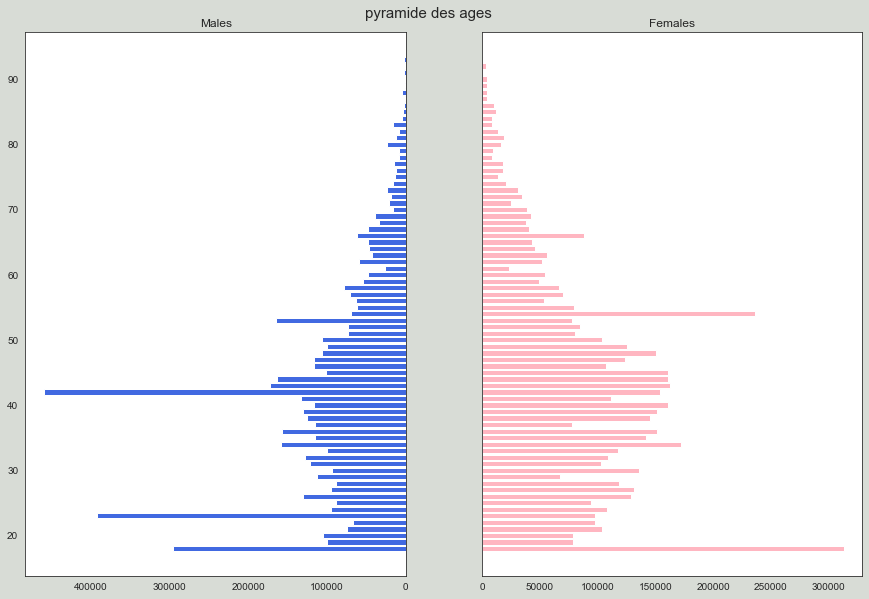

In [30]:
y = pyramide_age["age_client"]
x_male = pyramide_age["ca_male"]
x_female = pyramide_age["ca_female"]
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(15, 10))

#spécifier la couleur de fond et le titre du graphique
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"pyramide des ages ", fontsize=15, ha='center')


axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Females',)

#adjust grid parameters and specify labels for y-axis
#axes[1].grid()
#axes[0].set(yticks=y, yticklabels=pyramid['age_client'])
axes[0].invert_xaxis()
#axes[0].grid()

#display plot
plt.show()

- **chez les mâles,  les clients qui achètent le plus sont âgés respectivement de 42 ans, 23 ans et 18 ans.**
- **chez les females, les clients qui achètent le plus sont âgés respectivement de 18 ans, 54 ans et 34 ans.**

<h2> <a id="somme"> II Analyse bivariée</a></h2>

L'analyse bivariée consiste à analysé les relation qui peuvent exister entre des variables.

<h3 ><a id="mean"> 1. Etudier la reation entre le genre d’un client et les catégories des livres achetés</a></h3>

Pour étudier la relation entre le genre d'un client et les catégories de livre acheté qui sont des variables qualitatives, nous allons utiliser le test du khi deux d'indépendance.  
Les hypothèses du test sont: 

- H0: Les variables catégories de livre et genre d'un client sont indépendantes
- H1: Les variables catégories de livre et genre d'un client sont liées.  

Critére de decision :  
- p_value < 0.05: HO est rejetée
- p_value > 0.05: HO est acceptée

In [31]:
#Tableau de contingence(caleur observer).
X = "sex"
Y = "categ"

cont = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len )
cont

categ,0,1,2
sex,,,
f,206220,114899,17283
m,209460,112270,19200


In [32]:
resultat_test = st.chi2_contingency(cont)
resultat_test[3]

array([[207066.56444861, 113161.81769444,  18173.61785695],
       [208613.43555139, 114007.18230556,  18309.38214305]])

Pour réaliser le test de Khi 2 il faut respecter la conditions suivante
- chaque case doit contenir 5 elements

In [33]:
resultat_test = st.chi2_contingency(cont)
alpha = 0.05
print("Statistique de test=",resultat_test[0], "\n")
print("p_value =",resultat_test[1], "\n")
print("Degré de liberté=",resultat_test[2], "\n")

p_value = resultat_test[1]
if p_value < alpha:
    print("p_value est inferieur à",alpha)
    print("L'hypothése nulle est rejetée\t ---> H1: les variables catégorie de livre et genre d'un client sont liées.")
else:
    print("p_value est superieur à",alpha)
    print("L'hypothése nulle est acceptée\t ---> H1: les variables catégorie de livre et genre d'un client sont liées.")
    
print("-"*80, "\n")
# Déterminer le coefficient de Cramer
n = sum(cont.sum())
coef_cramer = np.sqrt(resultat_test[0] / (n* (min(cont.shape) -1)))
 
print("Le coefficient de cramer est de :",round(coef_cramer,2))
if coef_cramer< 0.10:
    print("l'intensité de la relation entre les variable est trés faible")
elif coef_cramer<=0.10 and coef_cramer<0.20:
    print("l'intensité de la relation entre les variable est faible")
elif coef_cramer<=0.20 and coef_cramer<0.30:
    print("l'intensité de la relation entre les variable est moyenne")
else:
    print("l'intensité de la relation entre les variable est forte")

print("-"*80,"\n")

Statistique de test= 147.00253568681114 

p_value = 1.1989607410166063e-32 

Degré de liberté= 2 

p_value est inferieur à 0.05
L'hypothése nulle est rejetée	 ---> H1: les variables catégorie de livre et genre d'un client sont liées.
-------------------------------------------------------------------------------- 

Le coefficient de cramer est de : 0.01
l'intensité de la relation entre les variable est trés faible
-------------------------------------------------------------------------------- 



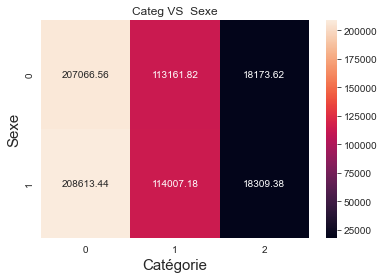

In [34]:
# plt.figure(figsize=(10,6)) 
sns.heatmap(resultat_test[3], annot=True, fmt="1.2f")
plt.xlabel("Catégorie",fontsize=15)
plt.ylabel("Sexe",fontsize=15)
plt.title("Categ VS  Sexe")
plt.show()

<h3 ><a id="loc">2. Etudier la relation entre l’âge des clients et le montant total des achats</a></h3>

Pour étudier le lien entre les variables quantitatives, il faut verifier certaines conditions
- Lien linéaire entre les 2 variables (si non linéaire : Corrélation de Spearman)
- Les 2 variables doivent être normalement distribuées
- Pas de données extrêmes

In [35]:
#Fonction test de Normalité (Shapiro)
def shapiro_test(x):
    print("="*100, "\n")
    print("Test de normalité (Test de Shapiro)\n")
    
    p_value = st.shapiro(x)[1]
    print("p_value =",p_value)
    print()
    alpha = 0.05
    
    if p_value < alpha:
        print("p_value est inferieur à",alpha)
        print("L'hypothése nulle est rejetée\t ---> H1: La variable ne suit pas une loi normale.")
    else:
        print("p_value est superieur à",alpha)
        print("L'hypothése nulle est acceptée\t ---> H0: La variable suit une loi normale.")


In [36]:
# Test de corrélation et de significativité
def spearman_test(x,y):
    print("="*100, "\n")
    print("Test d'indépendance (Test de Spearman)\n")

    rs = st.spearmanr(x,y)[0]
    pvalue = st.spearmanr(x,y)[1]

    if abs(rs) < .10:
        qual = 'négligeable (ou nulle)'
    elif abs(rs) < .20:
        qual = 'faible'
    elif abs(rs) < .40:
        qual = 'modérée'
    elif abs(rs) < .60:
        qual = 'plutôt forte'
    elif abs(rs) < .80:
        qual = 'forte'
    else:
        qual = 'très forte'

    print("Spearman coeff =",rs)
    print("Spearman pvalue =",pvalue)
    print()

    if rs == 0:
        print("On ne peut pas rejeter l'hypothèse nulle H0 (Les variables sont indépendantes)")

    elif rs < 0 :
        if pvalue < 0.05:
            print("Les variables présentent significativement une corrélation négative {} .".format(qual))
        else:
            print("Les variables présentent une corrélation négative {} peu significative".format(qual))

    elif rs > 0:
        if pvalue < 0.05:
            print("Les variables présentent significativement une corrélation positive {} .".format(qual))
        else:
            print("Les variables présentent une corrélation {} positive peu significative".format(qual))

In [37]:
#Claculer le montant total des achats, la frequence des achats et le panier moyen.
fm_client = df_final.groupby(["tranche_d'age","age_client"], as_index = False).agg({"id_prod": "count", "price": "sum"})
fm_client.columns = [ "tranche_d'age", "age_client", 'frequence', 'montant']
fm_client["panier_moyen"] =fm_client["montant"]/fm_client["frequence"]
fm_client.head()

,tranche_d'age,age_client,frequence,montant,panier_moyen
0,15 - 25ans,18,15149,609013.69,40.201577
1,15 - 25ans,19,4371,178195.78,40.767737
2,15 - 25ans,20,4587,184209.27,40.158986
3,15 - 25ans,21,4252,178497.70,41.979704
4,15 - 25ans,22,4415,165029.26,37.379221


#### Représentation graphique (nuange de points)

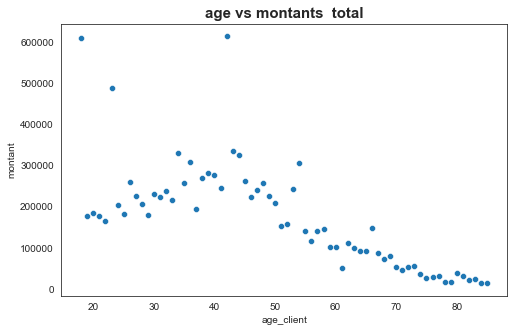

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="age_client", y="montant", data=fm_client)
plt.title("age vs montants  total",fontsize=15, fontweight= "bold")
plt.show()

##### Observations:
- De 0 à 43 ans, le nuage a une forme linéaire croissante.
- De 43 ans et plus, le nuage a une forme linéaire décroissante.
- La distribution n'est pas monotone donc nous allons utiliser le test de corrélation de Spearman.

#### Test de normalite de distribution.
Le test de normalité permet de vérifier si des données réelles suivent une loi normale ou non.  
Hypotheses de test:
- H0 : Les variables suivent une loi normale si p-value > 5%
- H1 : Les variables ne suivent pas une loi normale si p-value < 5%

In [39]:
shapiro_test(fm_client["age_client"])
shapiro_test(fm_client["montant"])


Test de normalité (Test de Shapiro)

p_value = 0.015444953925907612

p_value est inferieur à 0.05
L'hypothése nulle est rejetée	 ---> H1: La variable ne suit pas une loi normale.

Test de normalité (Test de Shapiro)

p_value = 2.478802161931526e-05

p_value est inferieur à 0.05
L'hypothése nulle est rejetée	 ---> H1: La variable ne suit pas une loi normale.


#### Calculer le coéfficient de corrélation de Spearman

In [40]:
spearman_test(fm_client["age_client"],fm_client["montant"])


Test d'indépendance (Test de Spearman)

Spearman coeff = -0.8015421613161812
Spearman pvalue = 2.2000318659089714e-16

Les variables présentent significativement une corrélation négative très forte .


<h3 ><a id="Moc">3. Etudier la relation entre l’âge des clients et la frequence des achats </a></h3>

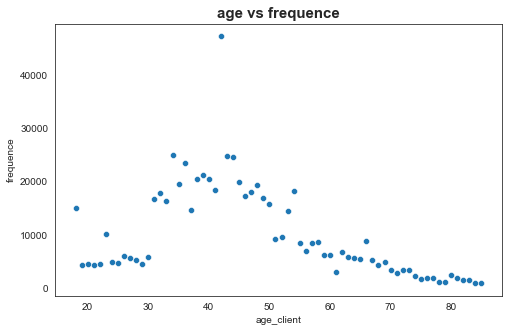

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="age_client", y="frequence", data=fm_client)
plt.title("age vs frequence",fontsize=15, fontweight= "bold")
plt.show()

##### Observations:
- De 0 à 30 ans, le nuage a une forme linéaire croissante.
- De 30 ans et plus, le nuage a une forme linéaire déccroissante.
- La distribution n'est pas monotone donc nous allons utiliser le test de corrélation de Spearman.

#### Test de normalite de distribution.

In [42]:
shapiro_test(fm_client["age_client"])
shapiro_test(fm_client["frequence"])


Test de normalité (Test de Shapiro)

p_value = 0.015444953925907612

p_value est inferieur à 0.05
L'hypothése nulle est rejetée	 ---> H1: La variable ne suit pas une loi normale.

Test de normalité (Test de Shapiro)

p_value = 3.810322368735797e-07

p_value est inferieur à 0.05
L'hypothése nulle est rejetée	 ---> H1: La variable ne suit pas une loi normale.


#### Calculer le coéfficient de corrélation de Spearman

In [43]:
spearman_test(fm_client["age_client"],fm_client["frequence"])


Test d'indépendance (Test de Spearman)

Spearman coeff = -0.5600259571706684
Spearman pvalue = 6.850656047894782e-07

Les variables présentent significativement une corrélation négative plutôt forte .


<h3 ><a id="Noc">4. Etudier la relation entre l’âge des clients et le panier moyen</a></h3>

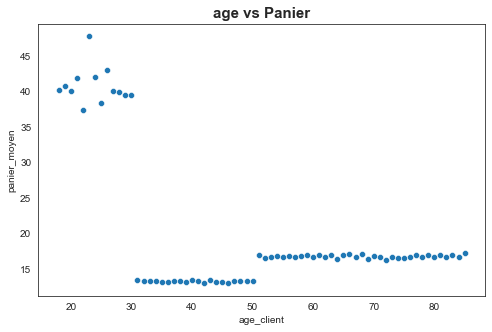

In [44]:
plt.figure(figsize=(8,5))

sns.scatterplot(x="age_client", y="panier_moyen", data=fm_client)
plt.title("age vs Panier",fontsize=15, fontweight= "bold")

plt.show()

##### Observations:
- La distribution n'est pas monotone donc nous allons utiliser le test de corrélation de Spearman.


#### Test de normalite de distribution.

In [45]:
shapiro_test(fm_client["age_client"])
shapiro_test(fm_client["panier_moyen"])


Test de normalité (Test de Shapiro)

p_value = 0.015444953925907612

p_value est inferieur à 0.05
L'hypothése nulle est rejetée	 ---> H1: La variable ne suit pas une loi normale.

Test de normalité (Test de Shapiro)

p_value = 7.848804939314391e-12

p_value est inferieur à 0.05
L'hypothése nulle est rejetée	 ---> H1: La variable ne suit pas une loi normale.


#### Calculer le coéfficient de corrélation de Spearman

In [46]:
spearman_test(fm_client["age_client"],fm_client["panier_moyen"])


Test d'indépendance (Test de Spearman)

Spearman coeff = -0.10352330419513685
Spearman pvalue = 0.40084752052437067

Les variables présentent une corrélation négative faible peu significative


#### Matrix de corrélation de Pearson et de Spearman

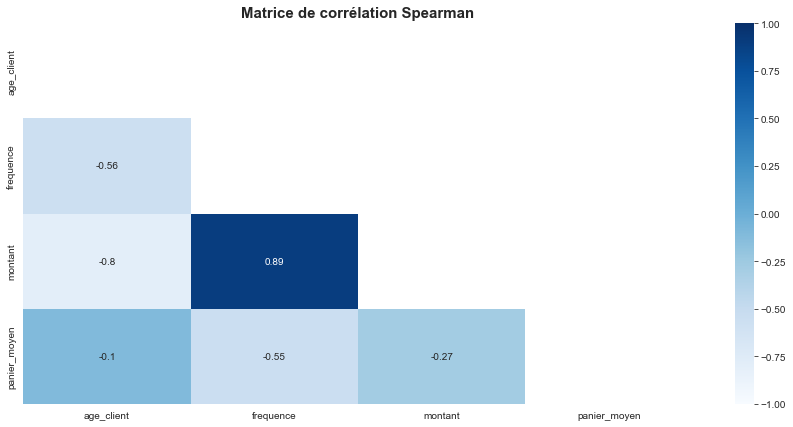

In [47]:
plt.figure(figsize=(15,7))

# plt.subplot(122)
corr_sp = fm_client.corr(method= "spearman")
mask = np.triu(np.ones_like(corr_sp, dtype=bool))
sns.heatmap(corr_sp, annot=True, mask = mask, cmap= "Blues" ,vmin = -1, vmax=1)
plt.title("Matrice de corrélation Spearman",fontsize=15, fontweight= "bold")
plt.show()

<h3 ><a id="pin">3. Etudier la relation entre l’âge des clients et les catégories des livres achetés</a></h3>

Pour etudier la relation entre l'age et les catégories des livres qui sont des variables quantitatives et qualitatives, nous allons utiliser le test Analyse of Variance (ANOVA).   
L'analyse de la variance permet d'étudier le comportement d'une variable quantitative en fonction d'une ou de plusieurs variables qualitatives. 

#### Representation graphique

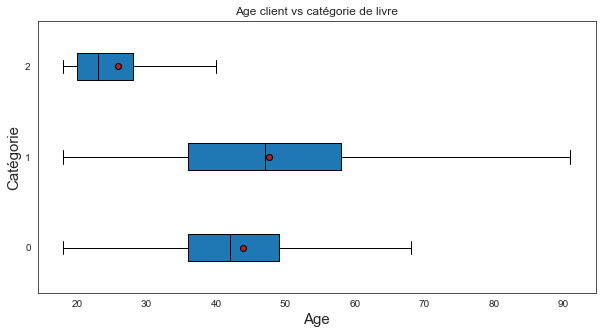

In [48]:
X = "categ" # qualitative
Y = "age_client" # quantitative
modalites = df_final[X].unique()
groupes = []
for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
plt.figure(figsize=(10,5))
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel("Catégorie",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.title("Age client vs catégorie de livre")
plt.show()

#### Observations
On voit ici que l'age moyen des clients est differents selon le categorie de livre acheté.    
- **Catégories 0:** clients âgés entre 18 et 68 ans environ, l'age moyen est de 45 ans environ.
- **Catégories 1:** clients âgés entre 18 et 93 ans environ, l'age moyen est de 48 ans environ.
- **Catégories 2:** clients âgés entre 18 et 40 ans environ, l'age moyen est de 27 ans environ.

#### Verification par les chiffres

Pour réaliser le test d'ANOVA , il faut verifier certaines conditions:
- Données distribuées normalement
- Pas de données extrêmes
- Variances des groupes égales
- ANOVA : Effectifs par classes à peu près égaux

##### Test de Normalité (Shapiro)

In [49]:
# Selectionner un echantillon
df_finale= df_final.sample(5000)
shapiro_test(df_finale["categ"])
shapiro_test(fm_client["age_client"])


Test de normalité (Test de Shapiro)

p_value = 0.0

p_value est inferieur à 0.05
L'hypothése nulle est rejetée	 ---> H1: La variable ne suit pas une loi normale.

Test de normalité (Test de Shapiro)

p_value = 0.015444953925907612

p_value est inferieur à 0.05
L'hypothése nulle est rejetée	 ---> H1: La variable ne suit pas une loi normale.


#### Test d'egalité des variances
Ce test permet de vérifier que les variances de chaque groupe sont égales ou non. 
Hypothese de test:
- H0 : Les variances de chaque groupe sont égales si p-value > 5%      
- H1 : Les variances de chaque groupe ne sont pas toutes égales  si p-value < 5%

In [50]:
X = df_final["categ"] # qualitative
Y = df_final["age_client"] # quantitative
test = st.f_oneway(X,Y)
print("p_value =",test[1])
print()
p_value = test [1]
if p_value < 0.05:
    print("L'hypothése nulle est rejetée\t ---> H1: Les variances de chaque groupe ne sont pas toutes égales .")
else:
    print("L'hypothése nulle est acceptée\t ---> H0: Les variances de chaque groupe sont égales.")
print("-"*80,"\n")

p_value = 0.0

L'hypothése nulle est rejetée	 ---> H1: Les variances de chaque groupe ne sont pas toutes égales .
-------------------------------------------------------------------------------- 



#### ANOVA
Dans une ANOVA, on cherche à déterminer si les moyennes des groupes sont significativement différentes. Hypothèses de tests:
- H0 : Pas d'effets d'âge sur les catégories(même moyenne) si p-value > 5%
- H1 : Au moins une catégorie a une moyenne d'âge significativement différente si p-value < 5%

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("age_client ~ categ", data=df_final).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
categ,1.232391e+06,1.0,6754.506766,0.0
Residual,1.239469e+08,679330.0,NaN,NaN


In [52]:
p_value = anova_table["PR(>F)"][0]
print()
print("p_value=",p_value)
print()
if p_value <0.05:
    print("L'hypothése nulle est rejetée\t ---> H1:Au moins une catégorie à une moyenne d'âge significativement différente.")
else:
     print("L'hypothése nulle est acceptée\t ---> H0:Pas d'effets d'âge sur les catégories(même moyenne).")


p_value= 0.0

L'hypothése nulle est rejetée	 ---> H1:Au moins une catégorie à une moyenne d'âge significativement différente.


<h2 id="Conclusion">Conclusion</h2>

Dans cette partie nous avons effectué une analyse univarié et une analyse bivariée.

L'analyse univariée du CA nous a permis de voir que :
- 39.25% du CA est réalisé sur les produits de catégorie 1
- Les clients âgés entre 36 et 45 ans achetent plus de livres de catégories 0 et 1 (respectivement 43.38% et  24.41%).
- Les clients agés entre 15 et 25 ans achetent plus de livre de catégories 2 (60.11%).
- Aucun produit de catégorie 1 n'a été vendu entre le 02/10/2021 et 27/10/2021.

L'analyse bivariée fait resortir des relations existantes entres differentes variables.

- Une faible liaison entre le genre de client et les catégories de livre acheté.
- Une forte corrélation négative entre l'âge des clients et la fréquence des achats: plus l'âge est grand, plus la fréquence des achats diminués.
- Une forte corrélation négative entre l'âge des clients et la montant total des achats: Pour l'âge du client est grand, moins est le montant des achats.
- Une corrélation entre l'âge des clients et les catégories de livre acheté.